# Importing the libraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score 


# Import Warnings

In [93]:
import warnings
warnings.filterwarnings(action='ignore')

# Reading the dataset

In [94]:
bikeshare = pd.read_csv('day.csv')

# Reading the top 5 rows

In [95]:
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Checking the shape of Data

In [96]:
bikeshare.shape

(730, 16)

Checking the dataset info

In [97]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no null value in the bikeshareset

# Data Cleaning

Dropping certain columns which are not useful for analysis

Column 'dteday' can be dropped as year and month columns are availabe

'instant' is just a row number identifier and hence can be dropped and has no relation to target

'casual' and 'registered' can be dropped as cnt i.e target variable which is just the sum of casual and registered columns

In [98]:
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [99]:
# Now we can drop the two columns mentioned above
bikeshare.drop(['dteday','instant','casual','registered'],axis=1,inplace = True)

In [100]:
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Handling Outliers

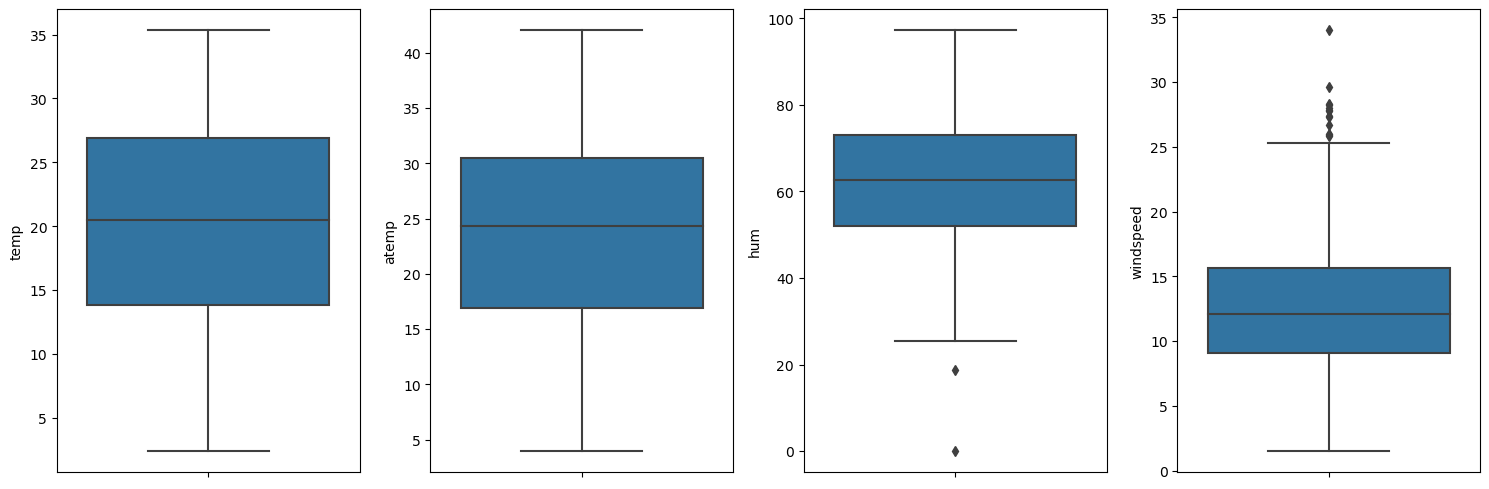

In [101]:
# Plot boxplot for the feature variable with continuous values
cols = ['temp','atemp','hum','windspeed']
i=1
plt.figure(figsize=(15,5))
for x in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=x ,data = bikeshare )
    i+=1
plt.tight_layout()

We can see that there are no outliers in the data so we don't need to handle any outlier

In [102]:
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# EDA

Converting categorical variables to original values

In [103]:
bikeshare.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'},inplace=True)

bikeshare.mnth.replace({1:'jan', 2:'feb', 3:'mar', 4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sept',
                       10:'oct',11:'nov',12:'dec'},inplace=True)

bikeshare.weekday.replace({0:'sun',1:'mon', 2:'tues', 3:'wed', 4:'thurs',5:'fri',6:'sat'},inplace=True)

bikeshare.weathersit.replace({1:'good', 2:'moderate', 3:'bad',4:'severe'},inplace=True)

In [104]:
bikeshare.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tues,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thurs,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


Analysing continuous numerical variables 

<Figure size 1000x1500 with 0 Axes>

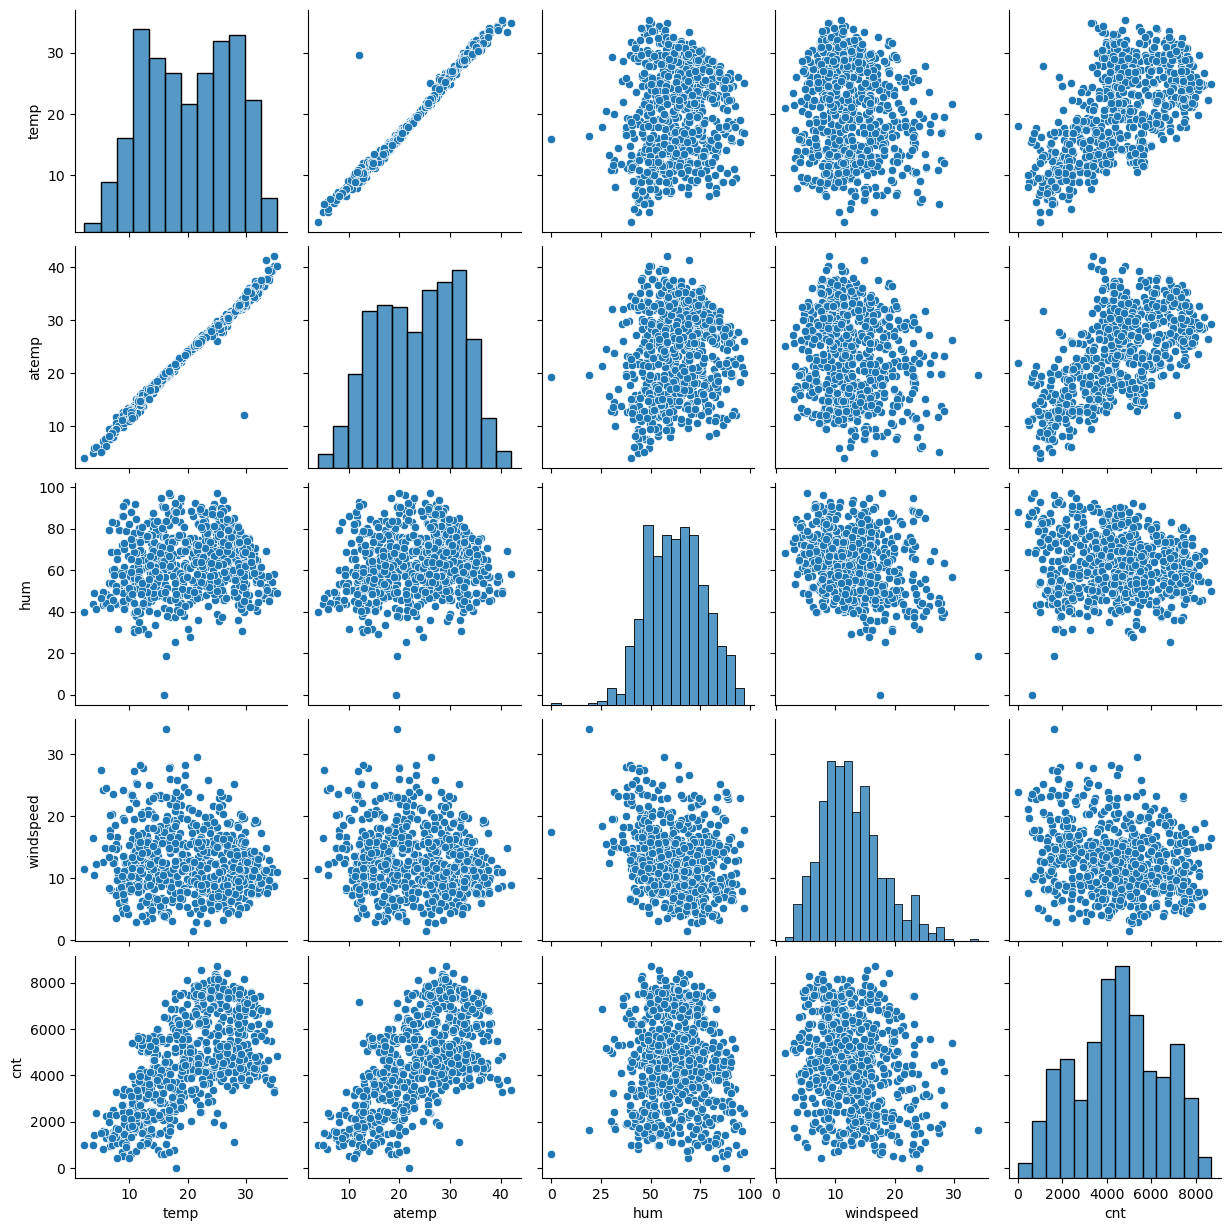

In [105]:
# visualising numerical variable
plt.figure(figsize=(10,15))
sns.pairplot(data=bikeshare,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

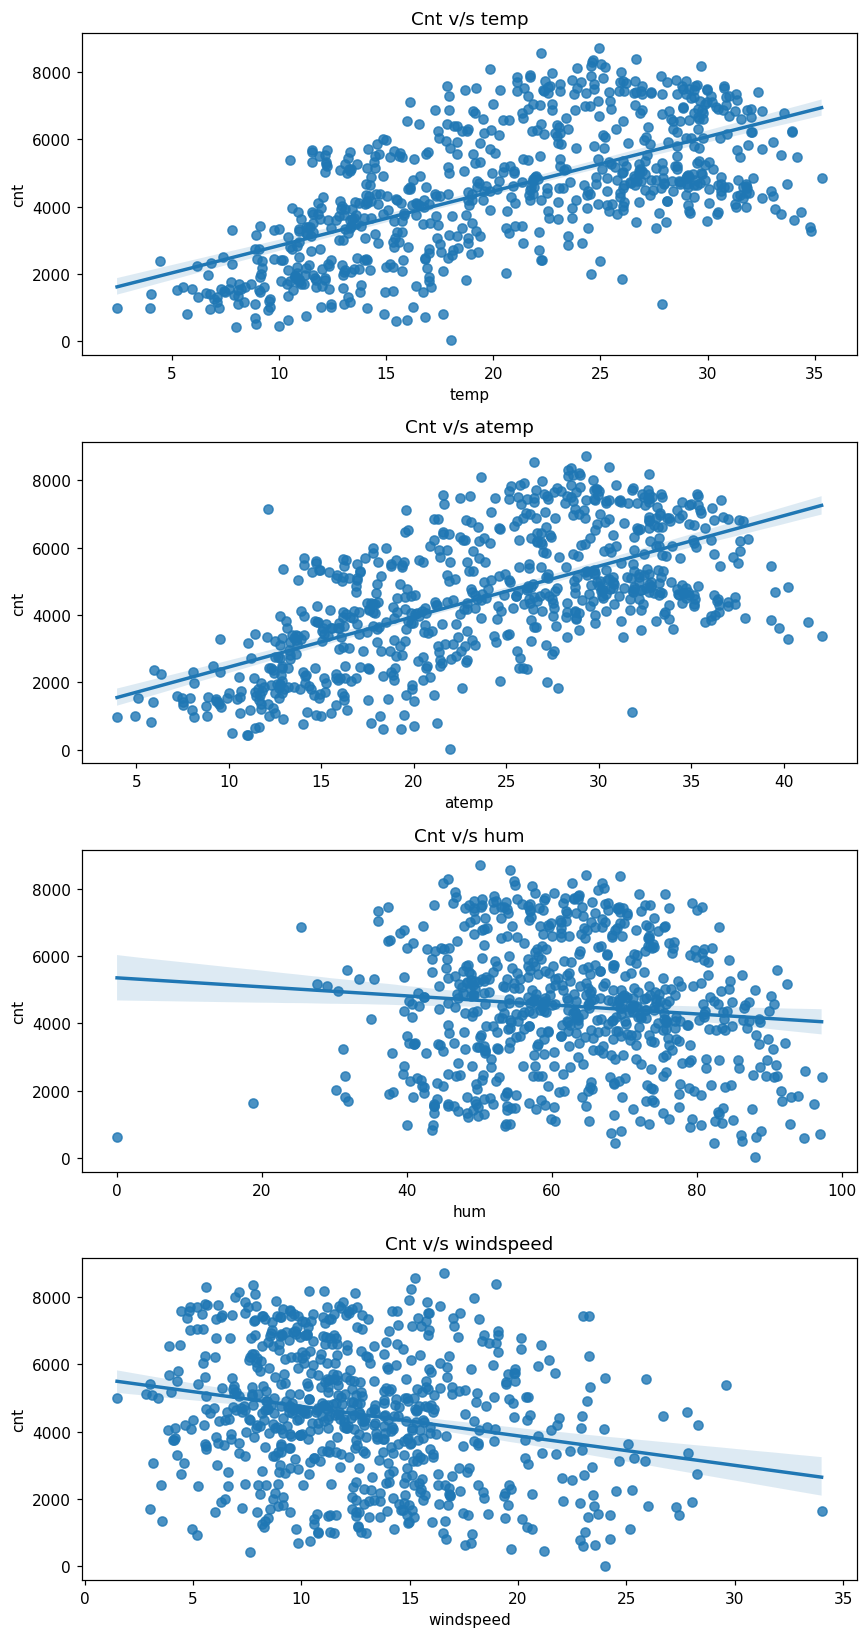

In [106]:
# creating regplots to show the variation of continous variables with target variables
plt.figure(figsize=(8,15) , dpi=110)
plt.subplot(4,1,1)
plt.title('Cnt v/s temp')
sns.regplot(data=bikeshare , x = 'temp' , y ='cnt')

plt.subplot(4,1,2)
plt.title('Cnt v/s atemp')
sns.regplot(data=bikeshare , x = 'atemp' , y ='cnt')

plt.subplot(4,1,3)
plt.title('Cnt v/s hum')
sns.regplot(data=bikeshare , x = 'hum' , y ='cnt')

plt.subplot(4,1,4)
plt.title('Cnt v/s windspeed')
sns.regplot(data=bikeshare , x = 'windspeed' , y ='cnt')

plt.tight_layout()

Analysing correlation between variables 

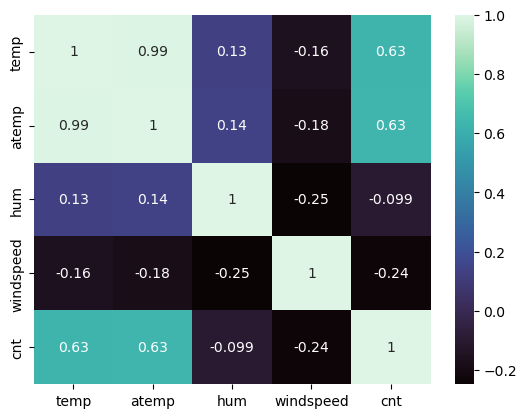

In [107]:
# creating list of numerical variables
num_vars =  ["temp","atemp","hum","windspeed","cnt"]

# heatmap to show correlation between numerical variables
sns.heatmap(bikeshare[num_vars].corr() , annot=True , cmap = 'mako')
plt.show()

Analyisng categorical variables

In [108]:
# creating a list containing all the categorical variables
categoricals = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

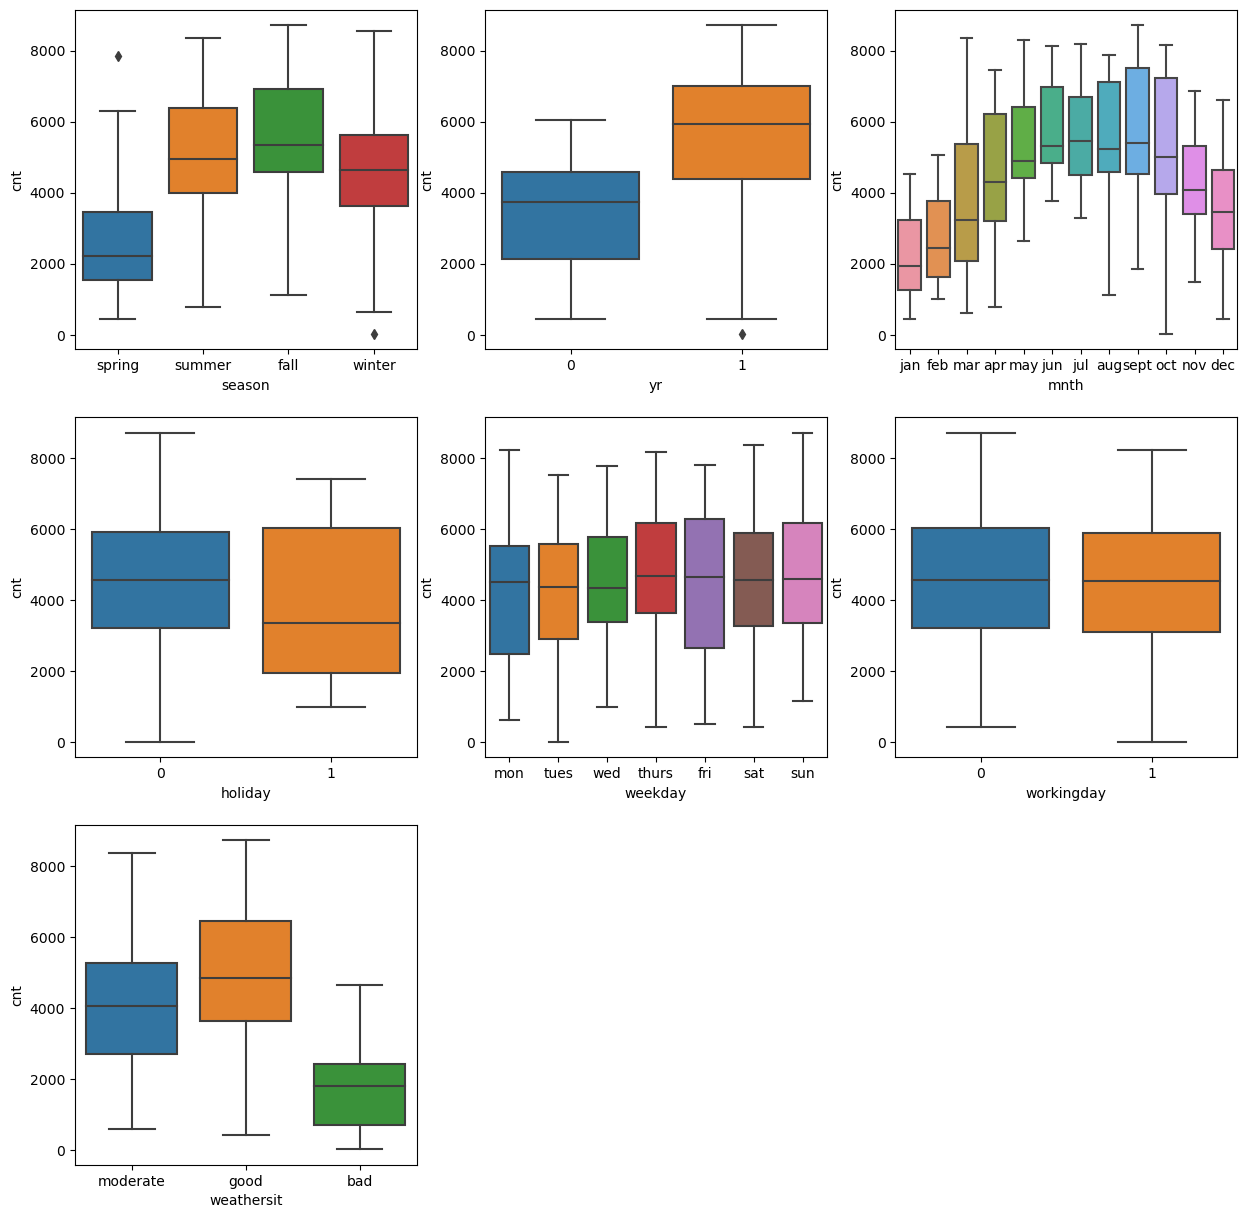

In [109]:
# boxplot to show the behaviour of categorical variables
plt.figure(figsize=(15,15))
for cat in enumerate(categoricals):
    plt.subplot(3,3,cat[0]+1)
    sns.boxplot(data=bikeshare , x=cat[1] , y='cnt')
plt.show()

In [110]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=bikeshare)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=bikeshare, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

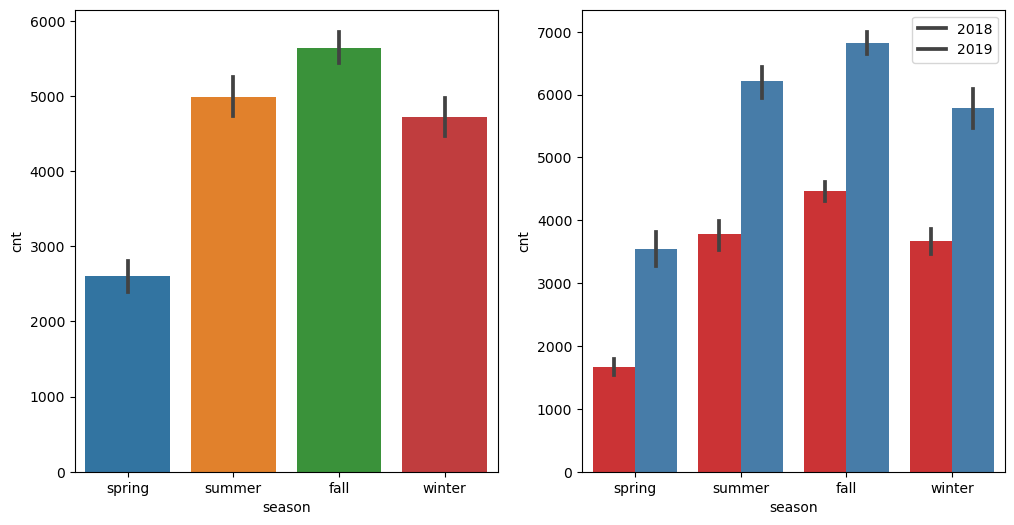

In [111]:
# plotting visualization for season column

plot_cat_columns('season')

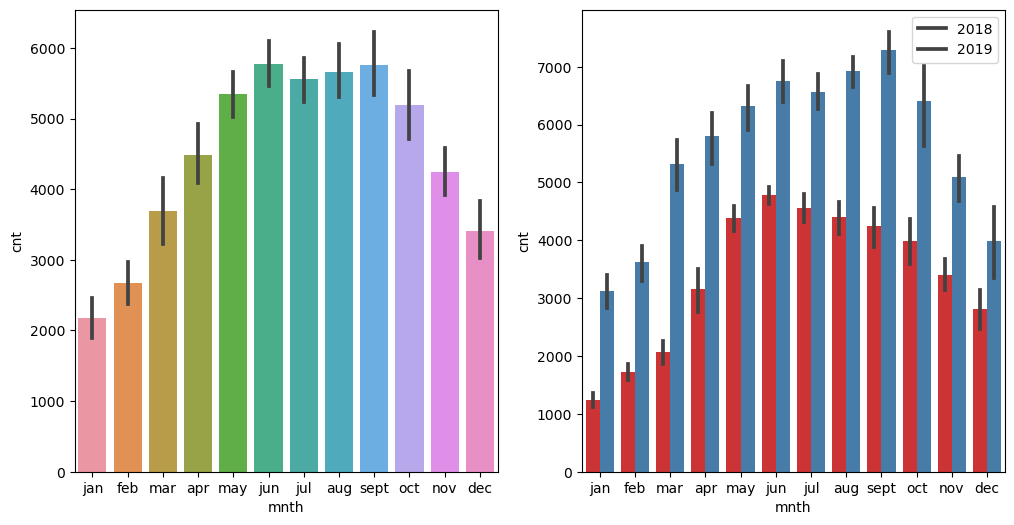

In [112]:
# plotting visualization for month column

plot_cat_columns('mnth')

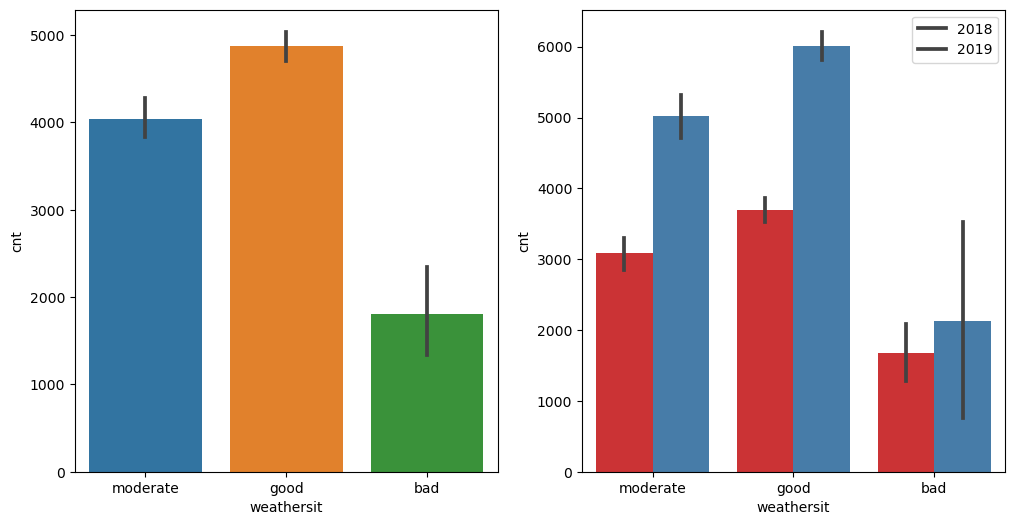

In [113]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

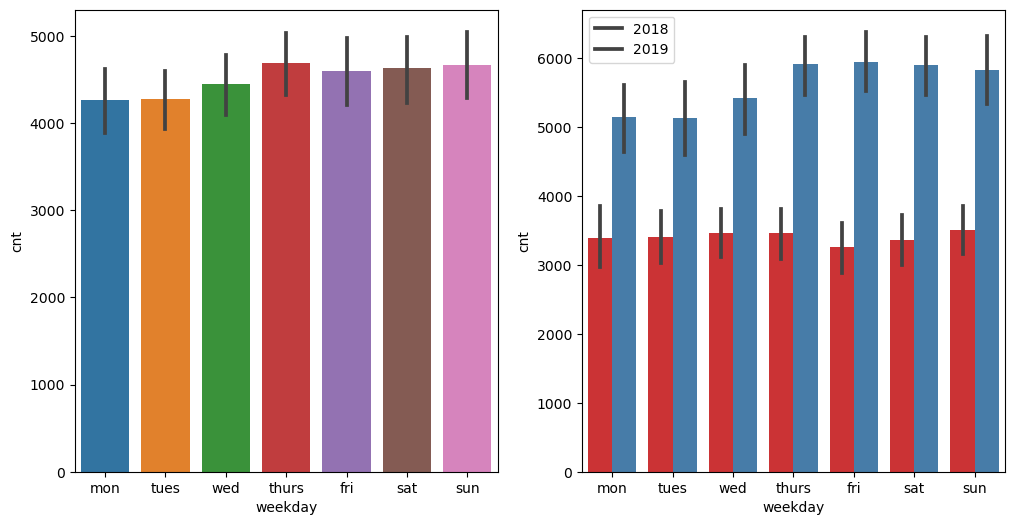

In [114]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

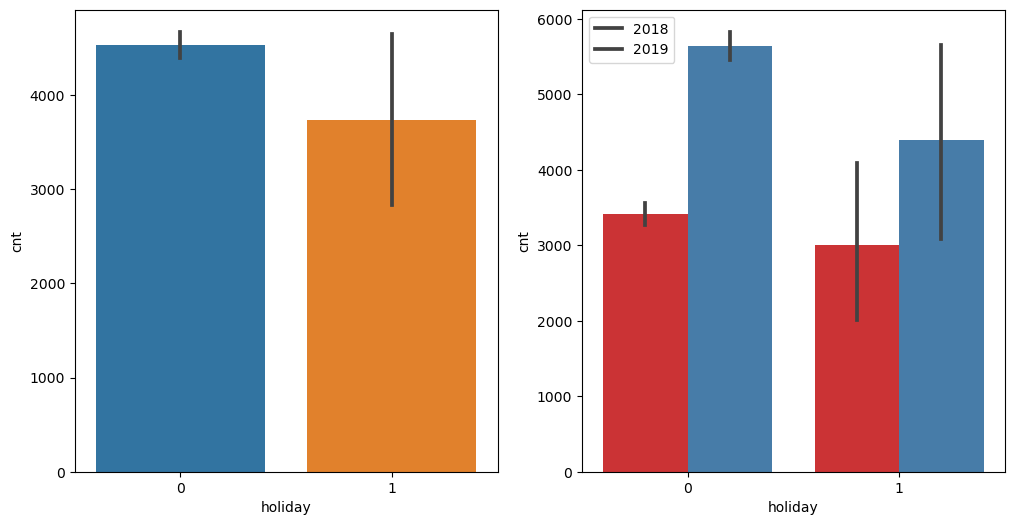

In [115]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

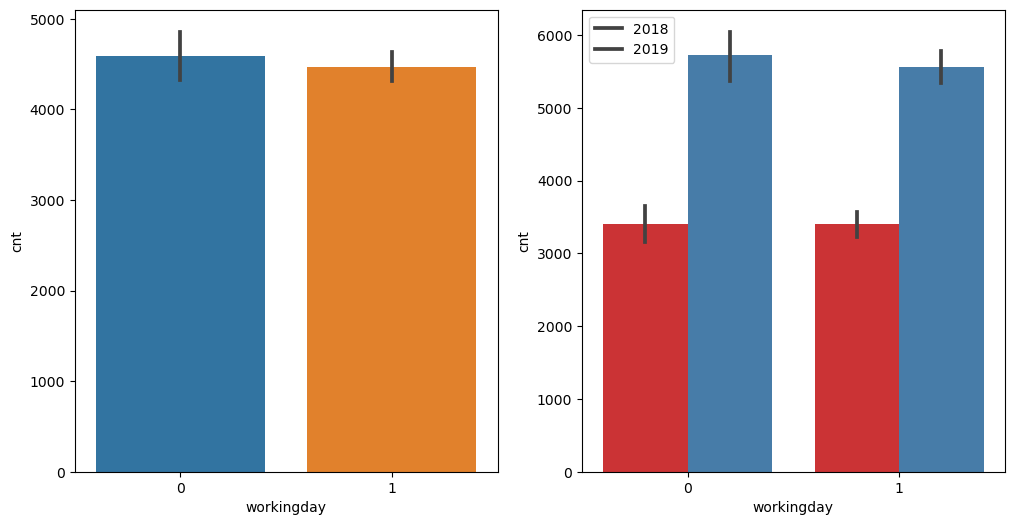

In [116]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

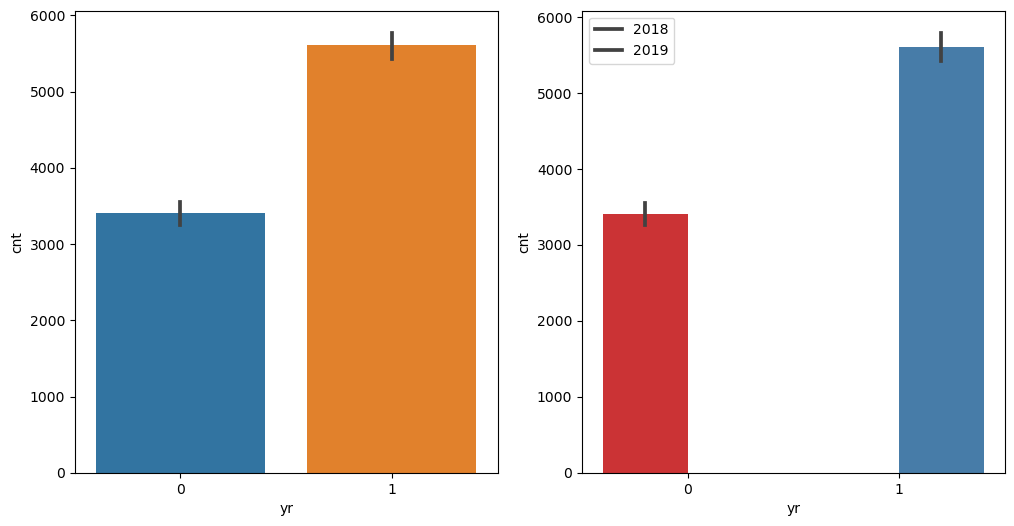

In [117]:
# plotting visualization for year column

plot_cat_columns('yr')

Correlation between variables of the dataset 

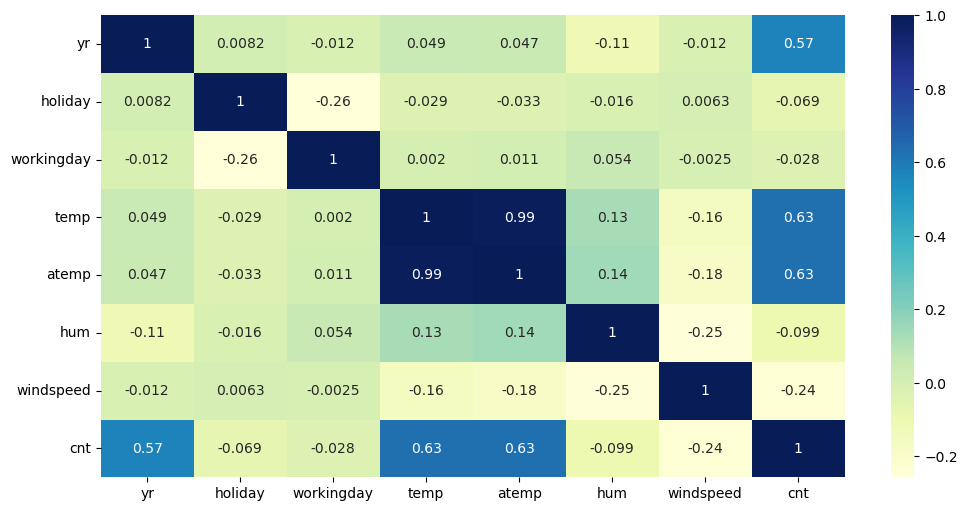

In [118]:
# heatmap plot to show correlation between variables
plt.figure(figsize=(12,6))
sns.heatmap(bikeshare.corr(),annot=True , cmap='YlGnBu')
plt.show()

# Data Preparation

Dummy Variables creation

In [119]:
#creating dummy variables and displaying first 5 rows to inspect the dataset
bikeshare = pd.get_dummies(data=bikeshare , columns=['season','mnth','weekday','weathersit'] ,drop_first=True)
bikeshare.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


In [120]:
# displaying all the columns of prepared dataset
bikeshare.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thurs', 'weekday_tues',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

## Splitting dataset into train and test datasets

In [121]:
np.random.seed(0)
df_train , df_test = train_test_split(bikeshare , train_size= 0.70 , random_state= 100)

In [122]:
# checking shape train and test dataset
print('training dataset::' , df_train.shape)
print('testing dataset::' , df_test.shape)

training dataset:: (510, 30)
testing dataset:: (220, 30)


In [123]:
# inspect training dataset
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,1,0,0,0,0,1


# Feature scaling continuous variables

In this modelling we'll use min-max scaling technique

In [124]:
# creating a list of continuous feature variables
num_vars = ["temp","atemp","hum","windspeed",'cnt']

#scaling variables using minmaxscalar()
scaler = MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [125]:
# inspecting dataset after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [126]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.625490,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


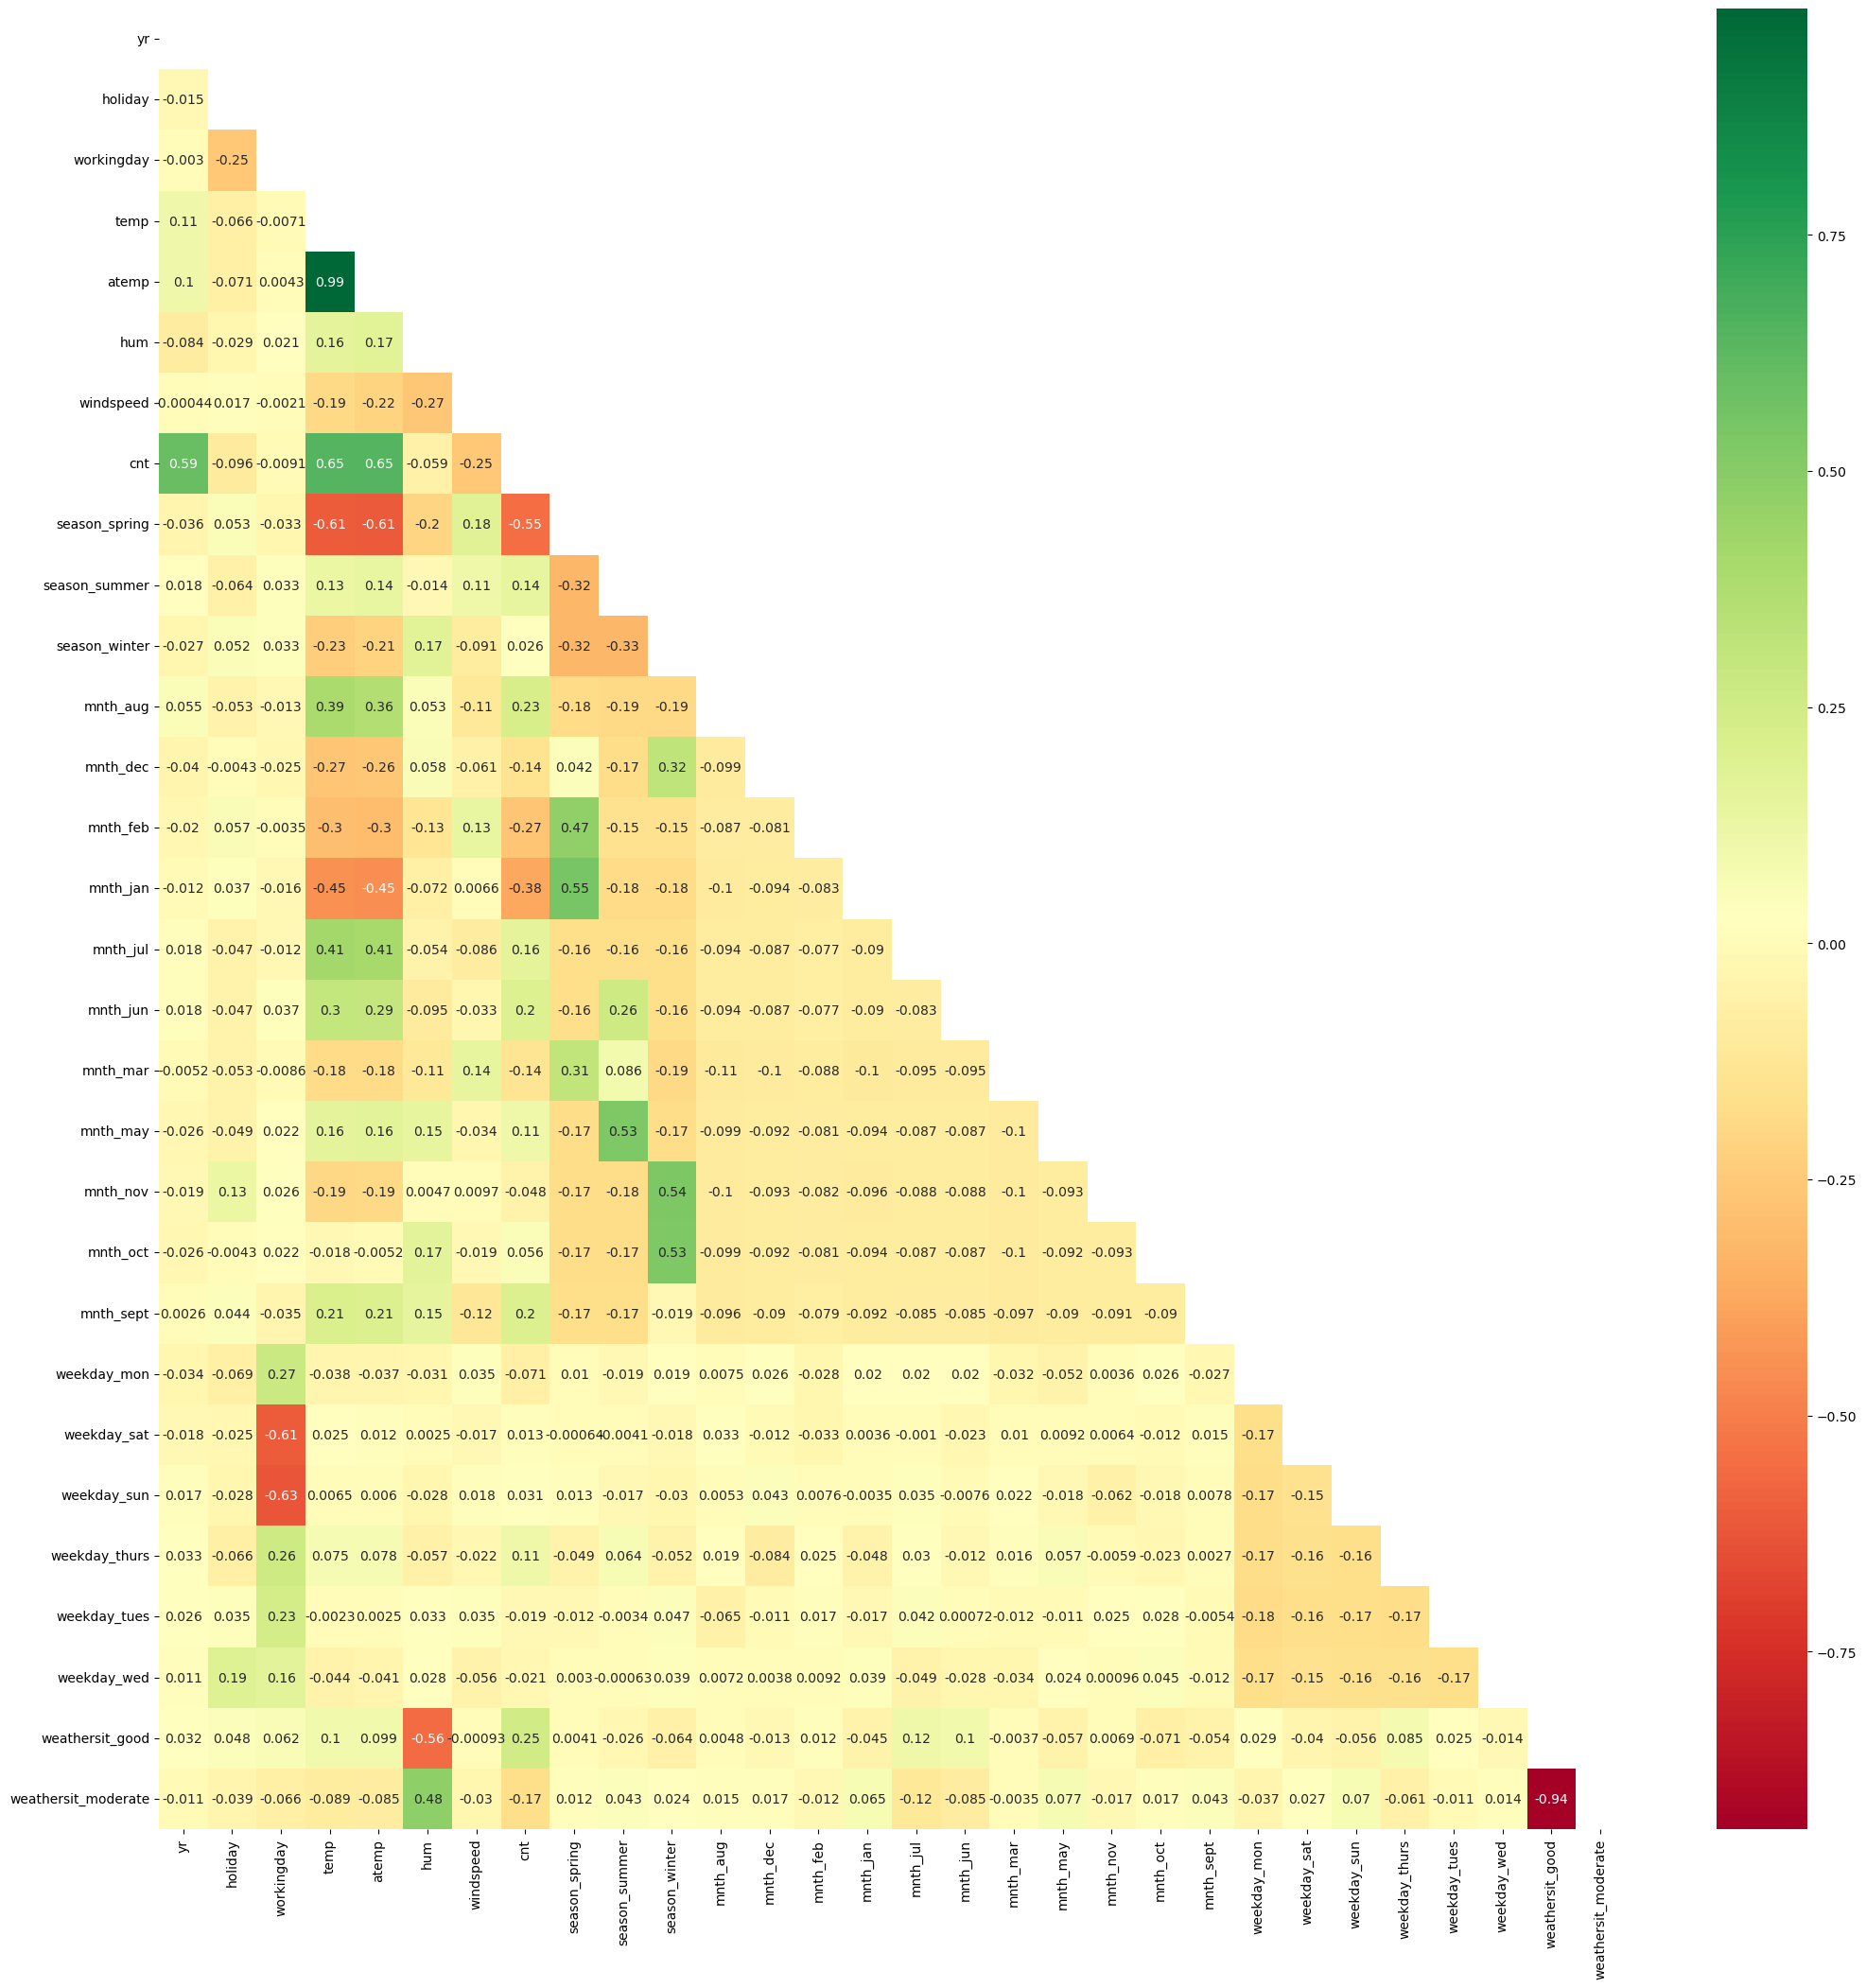

In [127]:
# check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25,25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot=True , cmap='RdYlGn',mask=matrix)
plt.show()

### Dividing into X and Y sets for the model building

In [128]:
y_train = df_train.pop('cnt')
X_train = df_train

In [129]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thurs', 'weekday_tues',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [130]:
# creating a list of continuous feature variables
num_vars = ["temp","atemp","hum","windspeed"]

# inspecting statistical information of the training data after scaling
X_train[num_vars].describe()

,temp,atemp,hum,windspeed
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883
std,0.225858,0.212410,0.145846,0.169803
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179
50%,0.542596,0.529718,0.653714,0.296763
75%,0.735215,0.688457,0.754830,0.414447
max,1.000000,1.000000,1.000000,1.000000


Now we can see that after scaling numerical feature variables values lie between 0 and 1 

# Building Model

#### We'll be using SciKit Learn for building our model

Using RFE to eliminate some columns which are not effective in model building (automated approach)

In [131]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [132]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm , n_features_to_select= 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [133]:
# columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 9),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thurs', False, 14),
 ('weekday_tues', False, 7),
 ('weekday_wed', False, 11),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [134]:
# Features selected by bRFE
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sept', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [135]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_aug', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thurs', 'weekday_tues', 'weekday_wed'],
      dtype='object')

In [136]:
# Function to calculate VIF for feature variable
def vifcal(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Building model using statsmodel, for the detailed statistics

In [137]:
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sept', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

### MODEL 1

We'll be using manual approach to eliminate some feature variable which won't be effective in model building

In [138]:
# dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [139]:
# Building 1st linear regression model
X_train_sm = X_train_rfe
X_train_sm = sm.add_constant(X_train_sm)
lm_1 = sm.OLS(y_train , X_train_sm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          8.15e-189
Time:                        12:56:06   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0732      0.048      1.540      0.124      -0.020       0.167
yr                      0.2304      0.008     28.487      0.000       0.215       0.246
holiday                -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                    0.4815      0.037     13.005      0.000       0.409       0.554
hum                    -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed              -0.1887      0.026     -7.315      0.000      -0.239      -0.138
season_spring          -0.0613      0.021     -2.881      0.004      -0.103      -0.019
season_summer           0.0423      0.015      2.761      0.006       0.012       0.072
season_winter           0.1019      0.018      5.656      0.000       0.067       0.137
mnth_dec               -0.0355      0.018     -2.024      0.043      -0.070      -0.001
mnth_jan               -0.0434      0.018     -2.393      0.017      -0.079      -0.008
mnth_jul               -0.0553      0.018     -3.030      0.003      -0.091      -0.019
mnth_nov               -0.0387      0.019     -2.057      0.040      -0.076      -0.002
mnth_sept               0.0755      0.017      4.466      0.000       0.042       0.109
weathersit_good         0.2465      0.026      9.331      0.000       0.195       0.298
weathersit_moderate     0.1922      0.025      7.687      0.000       0.143       0.241
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
# Running the function to calculate VIF for the new model
vifcal(X_train_rfe)

,Features,VIF
3,hum,26.33
2,temp,25.12
13,weathersit_good,15.65
14,weathersit_moderate,9.30
5,season_spring,5.75
4,windspeed,4.67
7,season_winter,4.53
6,season_summer,3.30
0,yr,2.10
11,mnth_nov,1.91


'mnth_dec' has p-value very close to 0.05 and has negative coefficient, so dropping it and observing it affect on other feature variables

### MODEL 2


In [141]:
#dropping 'days_old' feature as it has high p-value and high VIF
X_train_new = X_train_rfe.drop(['mnth_dec'],axis=1)

In [142]:
# Building 2nd linear regression model
X_train_sm = sm.add_constant(X_train_new)
lm_2= sm.OLS(y_train , X_train_sm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          4.41e-189
Time:                        12:56:07   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0629      0.047      1.326      0.185      -0.030       0.156
yr                      0.2302      0.008     28.371      0.000       0.214       0.246
holiday                -0.0920      0.026     -3.582      0.000      -0.142      -0.042
temp                    0.5055      0.035     14.369      0.000       0.436       0.575
hum                    -0.1697      0.038     -4.497      0.000      -0.244      -0.096
windspeed              -0.1858      0.026     -7.190      0.000      -0.237      -0.135
season_spring          -0.0562      0.021     -2.652      0.008      -0.098      -0.015
season_summer           0.0479      0.015      3.168      0.002       0.018       0.078
season_winter           0.0972      0.018      5.421      0.000       0.062       0.132
mnth_jan               -0.0341      0.018     -1.936      0.053      -0.069       0.001
mnth_jul               -0.0559      0.018     -3.057      0.002      -0.092      -0.020
mnth_nov               -0.0236      0.017     -1.362      0.174      -0.058       0.010
mnth_sept               0.0802      0.017      4.775      0.000       0.047       0.113
weathersit_good         0.2404      0.026      9.131      0.000       0.189       0.292
weathersit_moderate     0.1876      0.025      7.511      0.000       0.139       0.237
==============================================================================
Omnibus:                       60.634   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.746
Skew:                          -0.640   Prob(JB):                     7.44e-31
Kurtosis:                       5.211   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
# Running the function to calculate VIF for the new model
vifcal(X_train_new)

,Features,VIF
3,hum,25.28
2,temp,22.80
12,weathersit_good,14.70
13,weathersit_moderate,8.98
5,season_spring,5.71
4,windspeed,4.67
7,season_winter,4.39
6,season_summer,3.22
0,yr,2.10
8,mnth_jan,1.70


p-value of 'mnth_nov' has gone high so dropping it

### MODEL 3

In [144]:
# dropping 'mnth_feb' feature vecause it has a high p-value
X_train_new = X_train_new.drop(['mnth_nov'],axis=1)

In [145]:
# Building 3rd linear regression model
X_train_sm = sm.add_constant(X_train_new)
lm_3 = sm.OLS(y_train , X_train_sm).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          7.59e-190
Time:                        12:56:07   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0572      0.047      1.210      0.227      -0.036       0.150
yr                      0.2301      0.008     28.339      0.000       0.214       0.246
holiday                -0.0963      0.026     -3.773      0.000      -0.146      -0.046
temp                    0.5124      0.035     14.706      0.000       0.444       0.581
hum                    -0.1681      0.038     -4.452      0.000      -0.242      -0.094
windspeed              -0.1874      0.026     -7.253      0.000      -0.238      -0.137
season_spring          -0.0519      0.021     -2.476      0.014      -0.093      -0.011
season_summer           0.0502      0.015      3.336      0.001       0.021       0.080
season_winter           0.0919      0.018      5.247      0.000       0.057       0.126
mnth_jan               -0.0333      0.018     -1.892      0.059      -0.068       0.001
mnth_jul               -0.0556      0.018     -3.039      0.003      -0.092      -0.020
mnth_sept               0.0827      0.017      4.951      0.000       0.050       0.116
weathersit_good         0.2392      0.026      9.084      0.000       0.187       0.291
weathersit_moderate     0.1866      0.025      7.469      0.000       0.138       0.236
==============================================================================
Omnibus:                       58.633   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.919
Skew:                          -0.626   Prob(JB):                     2.26e-29
Kurtosis:                       5.154   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
# Running the function to calculate VIF for the new model
vifcal(X_train_new)

,Features,VIF
3,hum,25.26
2,temp,22.47
11,weathersit_good,14.46
12,weathersit_moderate,8.89
5,season_spring,5.62
4,windspeed,4.63
7,season_winter,4.08
6,season_summer,3.19
0,yr,2.10
8,mnth_jan,1.70


'mnth_jan' has p-value above 0.05 so dropping it

### MODEL 4

In [147]:
# dropping 'hum' feature because it has a high VIF value
X_train_new = X_train_new.drop(['mnth_jan'],axis=1)

In [148]:
# Building 4th linear regression model
X_train_sm = sm.add_constant(X_train_new)
lm_4 = sm.OLS(y_train , X_train_sm).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.95e-190
Time:                        12:56:07   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0478      0.047      1.015      0.311      -0.045       0.140
yr                      0.2294      0.008     28.208      0.000       0.213       0.245
holiday                -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temp                    0.5299      0.034     15.728      0.000       0.464       0.596
hum                    -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed              -0.1822      0.026     -7.074      0.000      -0.233      -0.132
season_spring          -0.0564      0.021     -2.700      0.007      -0.097      -0.015
season_summer           0.0531      0.015      3.536      0.000       0.024       0.083
season_winter           0.0976      0.017      5.643      0.000       0.064       0.132
mnth_jul               -0.0572      0.018     -3.123      0.002      -0.093      -0.021
mnth_sept               0.0833      0.017      4.973      0.000       0.050       0.116
weathersit_good         0.2369      0.026      8.983      0.000       0.185       0.289
weathersit_moderate     0.1843      0.025      7.364      0.000       0.135       0.233
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         25.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
# Running the function to calculate VIF for the new model
vifcal(X_train_new)

,Features,VIF
3,hum,24.61
2,temp,21.12
10,weathersit_good,14.08
11,weathersit_moderate,8.72
5,season_spring,5.46
4,windspeed,4.61
7,season_winter,4.00
6,season_summer,3.17
0,yr,2.09
8,mnth_jul,1.59


VIF of 'hum' is very high so dropping it first to see it's effect on other feature variables

### MODEL 5

In [150]:
# dropping 'hum' feature because it has a high VIF value
X_train_new = X_train_new.drop(['hum'],axis=1)

In [151]:
# Building 5th linear regression model
X_train_sm = sm.add_constant(X_train_new)
lm_5 = sm.OLS(y_train , X_train_sm).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          5.06e-187
Time:                        12:56:08   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0848      0.038     -2.239      0.026      -0.159      -0.010
yr                      0.2336      0.008     28.352      0.000       0.217       0.250
holiday                -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp                    0.4910      0.033     14.770      0.000       0.426       0.556
windspeed              -0.1479      0.025     -5.887      0.000      -0.197      -0.099
season_spring          -0.0672      0.021     -3.175      0.002      -0.109      -0.026
season_summer           0.0465      0.015      3.051      0.002       0.017       0.076
season_winter           0.0817      0.017      4.730      0.000       0.048       0.116
mnth_jul               -0.0521      0.019     -2.790      0.005      -0.089      -0.015
mnth_sept               0.0768      0.017      4.517      0.000       0.043       0.110
weathersit_good         0.2842      0.025     11.487      0.000       0.236       0.333
weathersit_moderate     0.2040      0.025      8.118      0.000       0.155       0.253
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
# Running the function to calculate VIF for the new model
vifcal(X_train_new)

,Features,VIF
9,weathersit_good,14.02
2,temp,12.55
10,weathersit_moderate,7.91
3,windspeed,4.59
4,season_spring,3.98
5,season_summer,2.74
6,season_winter,2.64
0,yr,2.07
7,mnth_jul,1.59
8,mnth_sept,1.35


'weathersit_good' has a high VIF value so dropping it

### MODEL 6

In [153]:
# dropping 'temp' feature because it has high VIF
X_train_new = X_train_new.drop(['weathersit_good'],axis=1)

In [154]:
# Building 6th linear regression model
X_train_sm = sm.add_constant(X_train_new)
lm_6 = sm.OLS(y_train , X_train_sm).fit()
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          7.37e-163
Time:                        12:56:08   Log-Likelihood:                 438.86
No. Observations:                 510   AIC:                            -855.7
Df Residuals:                     499   BIC:                            -809.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1871      0.033      5.638      0.000       0.122       0.252
yr                      0.2390      0.009     25.862      0.000       0.221       0.257
holiday                -0.0840      0.029     -2.868      0.004      -0.142      -0.026
temp                    0.5032      0.037     13.479      0.000       0.430       0.577
windspeed              -0.1771      0.028     -6.307      0.000      -0.232      -0.122
season_spring          -0.0600      0.024     -2.524      0.012      -0.107      -0.013
season_summer           0.0494      0.017      2.887      0.004       0.016       0.083
season_winter           0.0718      0.019      3.703      0.000       0.034       0.110
mnth_jul               -0.0546      0.021     -2.607      0.009      -0.096      -0.013
mnth_sept               0.0673      0.019      3.527      0.000       0.030       0.105
weathersit_moderate    -0.0669      0.010     -6.849      0.000      -0.086      -0.048
==============================================================================
Omnibus:                      136.365   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.625
Skew:                          -1.193   Prob(JB):                    2.90e-107
Kurtosis:                       7.171   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
# Running the function to calculate VIF for the new model
vifcal(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.54
5,season_summer,2.23
4,season_spring,2.08
0,yr,2.06
6,season_winter,1.75
7,mnth_jul,1.58
9,weathersit_moderate,1.53
8,mnth_sept,1.33
1,holiday,1.04


Here 'temp' has VIF is just above 5 but it is an important feature

So we can try to drop any feature variable based on p-value and negative coefficient , it is possible that 'temp' maybe affected by it

'season_spring' has p-value greater than other and has negative coefficient, so dropping it

### MODEL 7

In [156]:
# dropping 'temp' feature because it has high VIF
X_train_new = X_train_new.drop(['season_spring'],axis=1)

In [157]:
# Building 6th linear regression model
X_train_sm = sm.add_constant(X_train_new)
lm_7 = sm.OLS(y_train , X_train_sm).fit()
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     207.7
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.16e-162
Time:                        12:56:08   Log-Likelihood:                 435.63
No. Observations:                 510   AIC:                            -851.3
Df Residuals:                     500   BIC:                            -808.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1180      0.019      6.269      0.000       0.081       0.155
yr                      0.2377      0.009     25.627      0.000       0.220       0.256
holiday                -0.0863      0.029     -2.933      0.004      -0.144      -0.029
temp                    0.5735      0.025     22.963      0.000       0.524       0.623
windspeed              -0.1823      0.028     -6.474      0.000      -0.238      -0.127
season_summer           0.0796      0.012      6.467      0.000       0.055       0.104
season_winter           0.1107      0.012      9.370      0.000       0.088       0.134
mnth_jul               -0.0441      0.021     -2.134      0.033      -0.085      -0.004
mnth_sept               0.0809      0.018      4.391      0.000       0.045       0.117
weathersit_moderate    -0.0663      0.010     -6.756      0.000      -0.086      -0.047
==============================================================================
Omnibus:                      128.223   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              421.568
Skew:                          -1.150   Prob(JB):                     2.87e-92
Kurtosis:                       6.814   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
# Running the function to calculate VIF for the new model
vifcal(X_train_new)

,Features,VIF
2,temp,5.06
3,windspeed,3.03
0,yr,2.00
4,season_summer,1.76
6,mnth_jul,1.52
8,weathersit_moderate,1.47
5,season_winter,1.43
7,mnth_sept,1.28
1,holiday,1.03


'mnth_jul' has p-value greater than other and has negative coefficient, so dropping it

### MODEL 8

In [159]:
# dropping 'temp' feature because it has high VIF
X_train_new = X_train_new.drop(['mnth_jul'],axis=1)

In [160]:
# Building 6th linear regression model
X_train_sm = sm.add_constant(X_train_new)
lm_8 = sm.OLS(y_train , X_train_sm).fit()
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     231.5
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          7.07e-163
Time:                        12:56:09   Log-Likelihood:                 433.31
No. Observations:                 510   AIC:                            -848.6
Df Residuals:                     501   BIC:                            -810.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1223      0.019      6.518      0.000       0.085       0.159
yr                      0.2385      0.009     25.632      0.000       0.220       0.257
holiday                -0.0849      0.030     -2.875      0.004      -0.143      -0.027
temp                    0.5497      0.022     24.521      0.000       0.506       0.594
windspeed              -0.1817      0.028     -6.428      0.000      -0.237      -0.126
season_summer           0.0881      0.012      7.543      0.000       0.065       0.111
season_winter           0.1152      0.012      9.869      0.000       0.092       0.138
mnth_sept               0.0910      0.018      5.094      0.000       0.056       0.126
weathersit_moderate    -0.0651      0.010     -6.622      0.000      -0.084      -0.046
==============================================================================
Omnibus:                      129.386   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.241
Skew:                          -1.166   Prob(JB):                     5.57e-92
Kurtosis:                       6.787   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
# Running the function to calculate VIF for the new model
vifcal(X_train_new)

,Features,VIF
2,temp,3.68
3,windspeed,2.99
0,yr,1.99
4,season_summer,1.57
7,weathersit_moderate,1.46
5,season_winter,1.35
6,mnth_sept,1.20
1,holiday,1.03


We see that 'temp' feature now has VIF below 5

From this model we can see that p-value of all the feature variables are well below 0.05 which tells that there is no multicollinearity among the variables and VIF of all the features are below 5

In this model we can see following key point::

1: R-squared is 78.7% and difference between R-squared and adjusted R-squared is 0.3% which is very low which tells that this modelling is not by chance. 

2: F-Satistics is above 1 i.e 231.5.

3: Prob(F-statistic) is 7.07e-163 which is almost equal to zero.

These observations suggests that overall model is significant and is ready to be implemented on test dataset

In [162]:
# Checking the parameters and coefficient values of the final model
lm_8.params

const                  0.122344
yr                     0.238475
holiday               -0.084856
temp                   0.549679
windspeed             -0.181655
season_summer          0.088128
season_winter          0.115191
mnth_sept              0.090997
weathersit_moderate   -0.065098
dtype: float64

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the distribution plot of the error terms and see what it looks like.

In [163]:
y_train_pred = lm_8.predict(X_train_sm)

In [164]:
# calculating residual
residual = y_train-y_train_pred

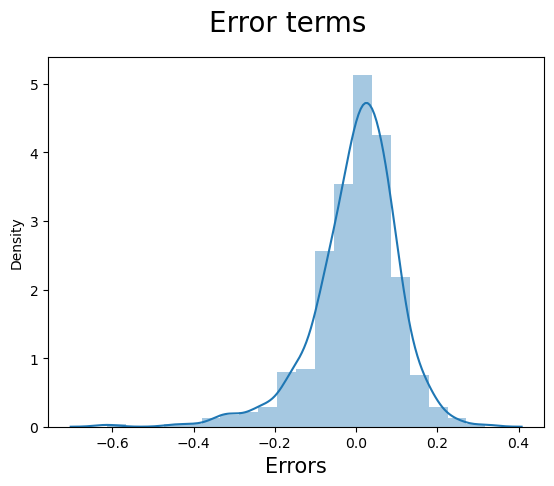

In [165]:
# plot the histogram of the errors
sns.distplot(residual,bins=20)
plt.suptitle('Error terms', fontsize = 20)
plt.xlabel('Errors', fontsize=15)
plt.show()

We can see that error terms follow Normal Distribution with mean 0 

### Linearity check

Plot scatter plot to see whether error terms follow linear nature or not

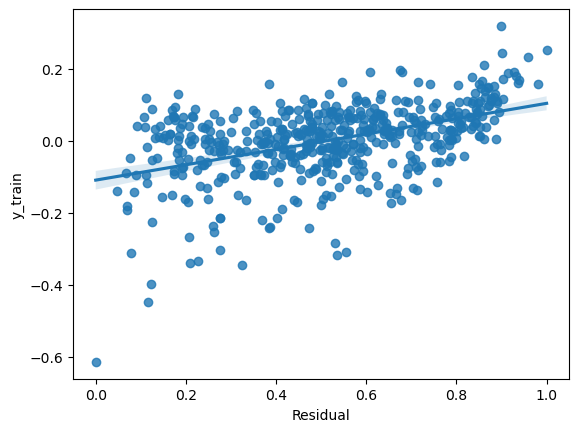

In [166]:
sns.regplot(y_train ,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

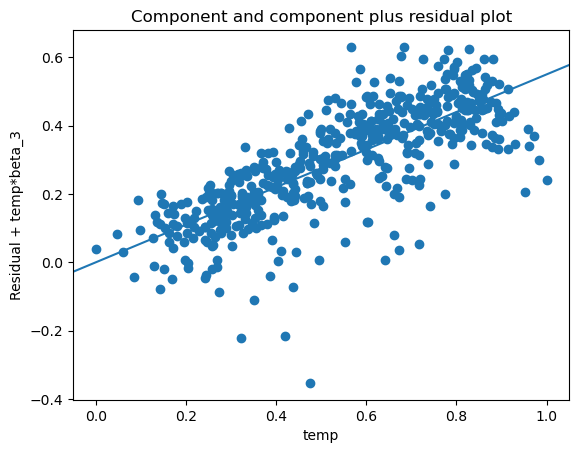

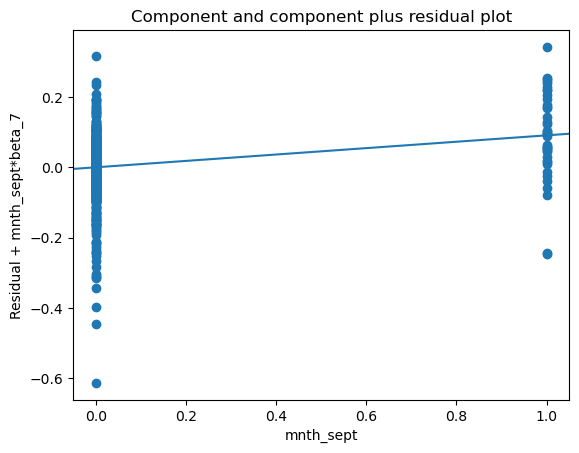

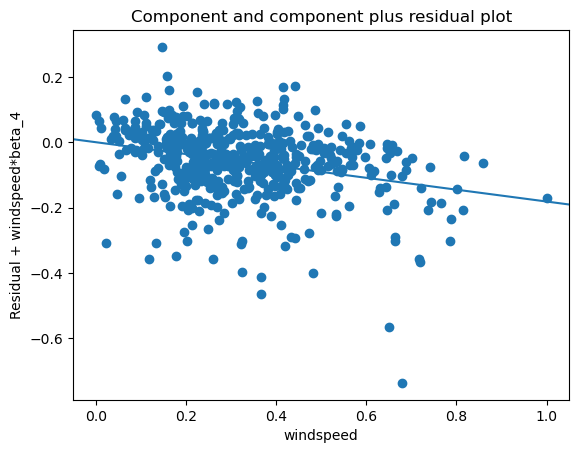

In [167]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lm_8, 'temp')
plt.show()

sm.graphics.plot_ccpr(lm_8, 'mnth_sept')
plt.show()

sm.graphics.plot_ccpr(lm_8, 'windspeed')
plt.show()

Linearity can be observed from above visualizations.

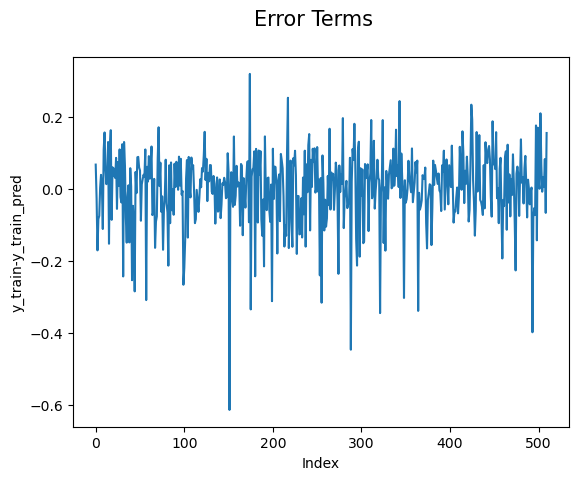

In [168]:
c = [i for i in range(0,len(X_train_sm),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

Here we see that error terms have no visible pattern so they are independent of each other 

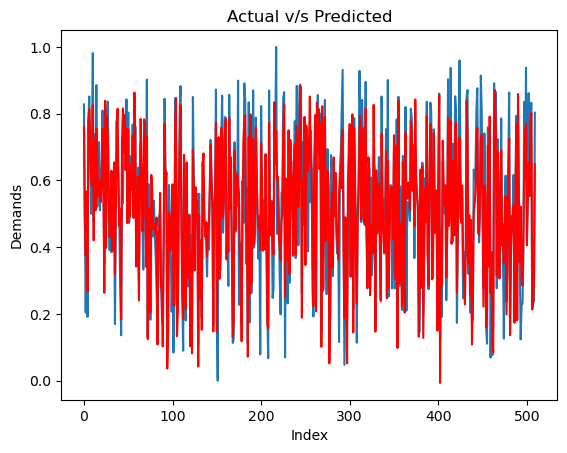

In [169]:
# plot to show actual v/s predicted data
x = [i for i in range(0,len(X_train_new))]

plt.plot(x,y_train)
plt.plot(x,y_train_pred, color='red')
plt.title('Actual v/s Predicted')
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

From the graph it is clearly evident that actual data and predicted data follows same pattern

# Making Predictions

In [170]:
# applying scaling on test data
num_vars1 = ["temp","atemp","hum","windspeed","cnt"]
scaler = MinMaxScaler()

df_test[num_vars1] = scaler.fit_transform(df_test[num_vars1])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_good,weathersit_moderate
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,1,0,0,1,0
299,0,0,0,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,0,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,1,0,0,0,0,1,0


In [171]:

df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tues,weekday_wed,weathersit_good,weathersit_moderate
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.546074,0.530791,0.508362,0.418803,0.517923,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.654545,0.318182
std,0.500809,0.187620,0.480828,0.248645,0.227648,0.200875,0.187683,0.239498,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.476601,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.361045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.543153,0.491299,0.403318,0.520681,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.719758,0.650989,0.523975,0.687956,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [172]:
# splitting dataset into target and feature variable
y_test = df_test.pop('cnt')
X_test = df_test

Now let's use our model to make prediction on test set

In [173]:
# creating dataframe on test dataset having columns of training model

X_test = X_test[X_train_new.columns]
X_test_sm = sm.add_constant(X_test)

In [174]:
# Making predictions
y_test_pred = lm_8.predict(X_test_sm)

In [175]:
# calculating r-squared for test dataset
r2 = r2_score(y_test, y_test_pred)
round(r2,4)

0.7543

R2 value for predictions on test data (0.754) is near to R2 value of train data(0.787) which tells that model is performing good even on test data

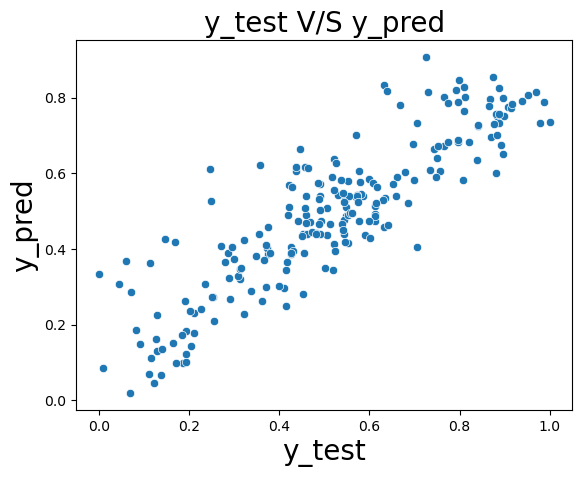

In [176]:
# Plotting y_test and y_pred to understand the spread.
plt.title('y_test V/S y_pred', fontsize = 20)
sns.scatterplot(y_test,y_test_pred)
plt.xlabel('y_test', fontsize = 20)
plt.ylabel('y_pred' , fontsize = 20)
plt.show()

In [177]:
# calculating residual of test data
residual_test = y_test-y_test_pred

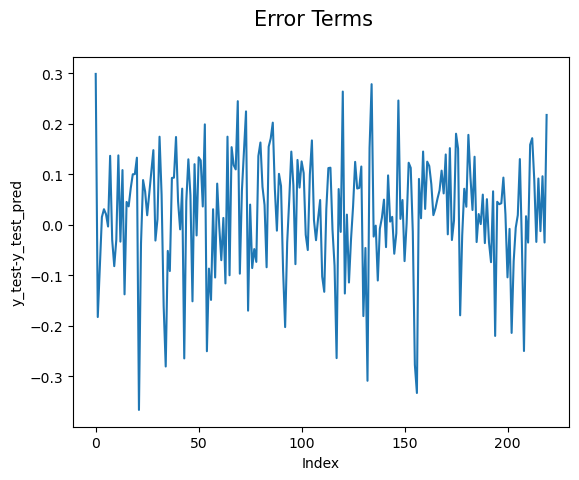

In [178]:
# checking the behaviour of error terms in test data
c1 = [i for i in range(0,len(X_test_sm),1)]
plt.plot(c1,y_test-y_test_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_test-y_test_pred')
plt.show()

As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

In [179]:
# displaying coefficents of best fitted line
round(lm_8.params,4)

const                  0.1223
yr                     0.2385
holiday               -0.0849
temp                   0.5497
windspeed             -0.1817
season_summer          0.0881
season_winter          0.1152
mnth_sept              0.0910
weathersit_moderate   -0.0651
dtype: float64

We can see that the equations of our best fitted line comes to be

cnt = 0.1223  +  0.2385 X yr  -  0.0849 X holiday  +  0.5497 X temp  -  0.1817 X windspeed  +  0.0881 X season_summer  +  0.1152 X season_winter  +  0.0910 X mnth_sept  -  0.0651 X weathersit_moderate  

In [180]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.745


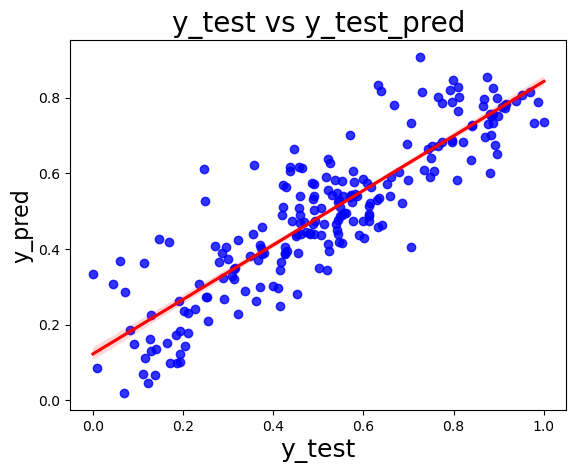

In [181]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.787
    - Test dataset R^2           : 0.754
    - Train dataset Adjusted R^2 : 0.784    
    - Test dataset Adjusted R^2  : 0.745

#### Demand of bikes depend on year, holiday, temp, windspeed, sep, moderate weather, summer and winter.